Felipe Eduardo Cezarini - RA: 168.830

Inteligência Artificial - Turma I - 1o semestre - 2025

Aula 17 - Exercício prático aprendizado por reforço

1) Considere o mundo de Wumpus e implemente um agente autônomo que visa alcançar o ouro usando aprendizado por reforço. Estabeleça uma recompensa para pegar o outro, cair em poços, ser morto pelo wumpus, andar pelas
células, etc. Pode usar algoritmos como Q-learning ou Sarsa.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#criacao do mapa da caverna do jogo
#significado dos valores na matriz:

# 0 - abismo
# 1 - posicao livre
# multiplo de 2 - presenca do monstro Wumpus
# multiplo de 3 - presenca do ouro
# multiplo de 5 - sensacao da brisa
# multiplo de 7 - sensacao do fedor

#matriz representa a caverna 5x5
caverna = np.ones((5,5),dtype=int)

lista_abismos = []
posicao_wumpus = []

#gerar 03 posicoes diferentes e aleatorias para os abismos
#nao sao aceitas: (0,0), (0,1) ou (1,0), por ser muito perto do inicio
for i in range(3):
  x = np.random.randint(5)
  y = np.random.randint(5)

  while((x==0 and y == 0) or (x==0 and y==1) or (x==1 and y==0) or ([x,y] in lista_abismos)):
    x = np.random.randint(5)
    y = np.random.randint(5)

  caverna[x][y] = 0
  lista_abismos.append([x,y])

print("abismos:",lista_abismos)

#gerar posicao aleatoria para o monstro Wumpus
#nao sao aceitas: (0,0), (0,1) ou (1,0), por ser muito perto do inicio
#nao pode ser um lugar que ja tenha um abismo
x = np.random.randint(5)
y = np.random.randint(5)

while((x==0 and y == 0) or (x==0 and y==1) or (x==1 and y==0) or (caverna[x][y]==0)):
  x = np.random.randint(5)
  y = np.random.randint(5)

caverna[x][y] = caverna[x][y] * 2
posicao_wumpus.append([x,y])

print("Wumpus:",posicao_wumpus[0])

#gerar posicao aleatoria para o ouro
#nao sao aceitas: (0,0), (0,1) ou (1,0), por ser muito perto do inicio
#nao pode ser um lugar que ja tenha um abismo, mas pode onde esta o Wumpus
x = np.random.randint(5)
y = np.random.randint(5)

while((x==0 and y == 0) or (x==0 and y==1) or (x==1 and y==0) or (caverna[x][y]==0)):
  x = np.random.randint(5)
  y = np.random.randint(5)

print("ouro:",[x,y])
caverna[x][y] = caverna[x][y] * 3

#sensacao da brisa por causa do abismo adjacente
for i in range(3):
  x = lista_abismos[i][0]
  y = lista_abismos[i][1]

  if(x-1 >= 0 and x+1 < 5 and y-1 >= 0 and y+1 < 5):
    caverna[x-1][y] = caverna[x-1][y] * 5
    caverna[x+1][y] = caverna[x+1][y] * 5
    caverna[x][y-1] = caverna[x][y-1] * 5
    caverna[x][y+1] = caverna[x][y+1] * 5
  elif(x-1 < 0 and x+1 < 5 and y-1 >= 0 and y+1 < 5):
    caverna[x+1][y] = caverna[x+1][y] * 5
    caverna[x][y-1] = caverna[x][y-1] * 5
    caverna[x][y+1] = caverna[x][y+1] * 5
  elif(x-1 < 0 and x+1 < 5 and y-1 >= 0 and y+1 >= 5):
    caverna[x+1][y] = caverna[x+1][y] * 5
    caverna[x][y-1] = caverna[x][y-1] * 5
  elif(x-1 >= 0 and x+1 < 5 and y-1 >= 0 and y+1 >= 5):
    caverna[x-1][y] = caverna[x-1][y] * 5
    caverna[x+1][y] = caverna[x+1][y] * 5
    caverna[x][y-1] = caverna[x][y-1] * 5
  elif(x-1 >= 0 and x+1 >= 5 and y-1 >= 0 and y+1 >= 5):
    caverna[x-1][y] = caverna[x-1][y] * 5
    caverna[x][y-1] = caverna[x][y-1] * 5
  elif(x-1 >= 0 and x+1 >= 5 and y-1 >= 0 and y+1 < 5):
    caverna[x-1][y] = caverna[x-1][y] * 5
    caverna[x][y-1] = caverna[x][y-1] * 5
    caverna[x][y+1] = caverna[x][y+1] * 5
  elif(x-1 >= 0 and x+1 < 5 and y-1 < 0 and y+1 < 5):
    caverna[x-1][y] = caverna[x-1][y] * 5
    caverna[x+1][y] = caverna[x+1][y] * 5
    caverna[x][y+1] = caverna[x][y+1] * 5
  else:
    caverna[x-1][y] = caverna[x-1][y] * 5
    caverna[x][y+1] = caverna[x][y+1] * 5

#sensacao do fedor por causa do monstro Wumpus
x = posicao_wumpus[0][0]
y = posicao_wumpus[0][1]

if(x-1 >= 0 and x+1 < 5 and y-1 >= 0 and y+1 < 5):
  caverna[x-1][y] = caverna[x-1][y] * 7
  caverna[x+1][y] = caverna[x+1][y] * 7
  caverna[x][y-1] = caverna[x][y-1] * 7
  caverna[x][y+1] = caverna[x][y+1] * 7
elif(x-1 < 0 and x+1 < 5 and y-1 >= 0 and y+1 < 5):
  caverna[x+1][y] = caverna[x+1][y] * 7
  caverna[x][y-1] = caverna[x][y-1] * 7
  caverna[x][y+1] = caverna[x][y+1] * 7
elif(x-1 < 0 and x+1 < 5 and y-1 >= 0 and y+1 >= 5):
  caverna[x+1][y] = caverna[x+1][y] * 7
  caverna[x][y-1] = caverna[x][y-1] * 7
elif(x-1 >= 0 and x+1 < 5 and y-1 >= 0 and y+1 >= 5):
  caverna[x-1][y] = caverna[x-1][y] * 7
  caverna[x+1][y] = caverna[x+1][y] * 7
  caverna[x][y-1] = caverna[x][y-1] * 7
elif(x-1 >= 0 and x+1 >= 5 and y-1 >= 0 and y+1 >= 5):
  caverna[x-1][y] = caverna[x-1][y] * 7
  caverna[x][y-1] = caverna[x][y-1] * 7
elif(x-1 >= 0 and x+1 >= 5 and y-1 >= 0 and y+1 < 5):
  caverna[x-1][y] = caverna[x-1][y] * 7
  caverna[x][y-1] = caverna[x][y-1] * 7
  caverna[x][y+1] = caverna[x][y+1] * 7
elif(x-1 >= 0 and x+1 < 5 and y-1 < 0 and y+1 < 5):
  caverna[x-1][y] = caverna[x-1][y] * 7
  caverna[x+1][y] = caverna[x+1][y] * 7
  caverna[x][y+1] = caverna[x][y+1] * 7
else:
  caverna[x-1][y] = caverna[x-1][y] * 7
  caverna[x][y+1] = caverna[x][y+1] * 7

print(caverna)

abismos: [[4, 2], [1, 2], [4, 0]]
Wumpus: [2, 1]
ouro: [3, 1]
[[ 1  1  5  1  1]
 [ 1 35  0  5  1]
 [ 7  2 35  1  1]
 [ 5 21  5  1  1]
 [ 0 25  0  5  1]]


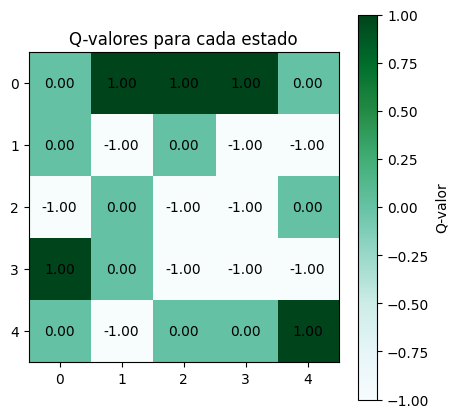

Tabela-Q:
[[ 0 -1 -1 -1]
 [-1 -1  1 -1]
 [ 1 -1 -1 -1]
 [ 1 -1 -1 -1]
 [ 0 -1 -1 -1]
 [ 0 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1  0  0  0]
 [ 1  1  1  1]
 [ 0  0  0  0]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 0 -1 -1 -1]
 [ 1 -1 -1 -1]]


In [27]:
#numero de estados = n_linhas * n_colunas
n_states = caverna.shape[0] * caverna.shape[1]

#para cada posicao, ha 04 moviementos possiveis
n_actions = 4

#inicializacao da tabela-Q
Q_table = np.zeros((n_states,n_actions),dtype=int)

#definicao dos parametros
learning_rate = 0.1
discount_factor = 0.9
exploration_prob = 0.2

#numero de episodios de treinamento
n_episodes = 1000

matriz = caverna.reshape(1,caverna.shape[0]*caverna.shape[1])
a = []
for i in range(n_states):
  if (matriz[0,i] == 0 or matriz[0,i]%2 == 0 or matriz[0,i]%3 == 0): #condicoes de fim-de-jogo
    a.append(i)

for episode in range(n_episodes):
  state = np.random.randint(0, n_states)
  while(state not in a): #condicoes para continuar explorando

    if(np.random.rand() < exploration_prob):
      action = np.random.randint(0,n_actions)
    else:
      action = np.argmax(Q_table[state])

    next_state = (state + 1) % n_states

    #funcao de recompensas:

    #cair no abismo: -10
    #encontrar o monstro Wumpus: -10
    #encontrar o ouro: +10
    #ir para um estado vazio: +0

    if(matriz[0][next_state] == 0):
      reward = -10
    elif(matriz[0][next_state] % 2 == 0):
       reward = -10
    elif(matriz[0][next_state] % 3 == 0):
       reward = 10

    Q_table[state, action] += learning_rate * (reward + discount_factor * np.max(Q_table[next_state]) - Q_table[state, action])
    state = next_state


q_values_grid = np.max(Q_table, axis=1).reshape((caverna.shape[0],caverna.shape[1]))
#fazer um grafico com os valores da tabela-Q
plt.figure(figsize=(5,5))
plt.imshow(q_values_grid, cmap='BuGn', interpolation='nearest')
plt.colorbar(label='Q-valor')
plt.title("Q-valores para cada estado")
plt.xticks(np.arange(caverna.shape[0]), ['0', '1', '2', '3', '4'])
plt.yticks(np.arange(caverna.shape[1]), ['0', '1', '2', '3', '4'])

#colocar os valores no grafico
for i in range(5):
    for j in range(5):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

print("Tabela-Q:")
print(Q_table)

Fontes consultadas:

- Mapa do Mundo de Wumpus implementado em atividades anteriores.

- Sildes da aula 17.

- https://www.geeksforgeeks.org/q-learning-in-python/.